In [8]:
import numpy as np
import pandas as pd
from math import log
import collections
from collections import Counter
import re
import minisom
from minisom import MiniSom
from sklearn.preprocessing import minmax_scale

In [9]:
data_txt = pd.read_csv('D:/NN HW 2021/HW2/bbc-text.csv')
stop_words = pd.read_csv('D:/NN HW 2021/HW2/stopwords.txt', sep ='\t')


In [10]:
x = data_txt.loc[:]['text']
y = data_txt.loc[:]['category']
class_labels = y.unique()

x = [re.sub("[^a-zA-Z ]+", "",txt) for txt in x] #Remove all non-letter characters from the documents
x = [re.sub(r'\b\w{1,2}\b','',txt) for txt in x] #Extract all words of the document and remove the short words (length ≤ 2
target = np.zeros(len(y), dtype=int)
y_array = y.to_numpy(y)
target[y_array == 'business'] = 0
target[y_array == 'entertainment'] = 1
target[y_array == 'politics'] = 2
target[y_array == 'sport'] = 3
target[y_array == 'tech'] = 4

In [11]:
stopw_list = list(stop_words.columns)[0].split() #Remove all stop words (e.g., ‘a’, ‘and’, ‘what’, …), given in file ‘stopwords.txt
docs_list = list()
docs_list_split = list()
for txt in x:
    txt = txt.split()
    txt_n = ""
    for word in txt:
        if(word in stopw_list) == False:
            txt_n =txt_n+word+" "
    docs_list_split.append(txt_n.split())
    docs_list.append(txt_n)

In [12]:
def tfidf(doc, _corpus): #. Compute the feature vector for each document, using TF-IDF weighting scheme.
    dic = collections.defaultdict(int)
    for x in _corpus:
        for y in x:
            dic[y] += 1.
    return {x: doc[x] * log(len(_corpus) / dic[x]) for x in doc}
doc_sets = [Counter(doc.split()) for doc in docs_list]
docs_list_tfidf = [tfidf(x, doc_sets) for x in doc_sets]

In [15]:
df_tfidf_docs = pd.DataFrame(docs_list_tfidf)
#print(df_tfidf_docs.head(5))
#print(df_tfidf_docs.tail(5))
df_tfidf_docs =  df_tfidf_docs.fillna(0)
data = df_tfidf_docs.to_numpy()
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
#data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
#data.shape
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984
0,4.210787,6.727414,11.155584,3.588018,3.857365,3.376779,5.761602,17.501231,10.13691,5.239832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.794009,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,7.707512,7.707512,7.707512,7.707512,7.707512,7.707512,7.707512,7.707512,7.707512,0.000000


In [16]:
for i in range(data.shape[0]):
    temp = data[i]
    data[i] = minmax_scale(temp,feature_range=(0,1))

In [17]:
sample_num, words_num = df_tfidf_docs.shape
som_shape = (1,5)
som = MiniSom(som_shape[0], som_shape[1], words_num, sigma= 2 , learning_rate= 0.25, 
              activation_distance='euclidean')
som.random_weights_init(data)
som.train_batch(data, 5000 , verbose=True)

C:\Users\Parisan\Anaconda3\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.4307048996422695


<Figure size 432x288 with 0 Axes>

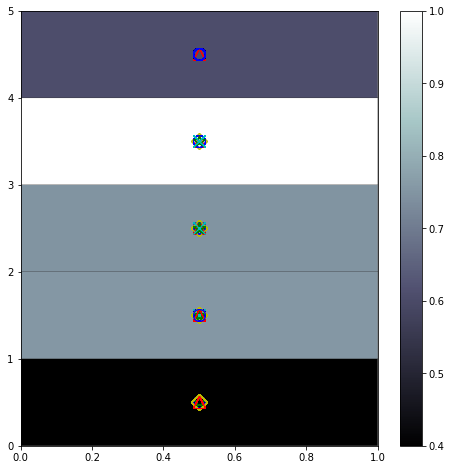

In [18]:
from pylab import plot,axis,show,pcolor,colorbar,bone
import matplotlib.pyplot as plt
bone()
plt.figure(figsize=(8, 8))
pcolor(som.distance_map().T,edgecolors='k') # distance map as background
colorbar()
#camp='viridis' cmap='RdBu' , "^" , "*" , "." , "x", 'o','s','D','^' , '*' 
markers = [ "^" , "*" , "o" , "x" , "D" ]
colors = "rgbcy"
for cnt,xx in enumerate(data):
  w = som.winner(xx) # getting the winner
 # palce a marker on the winning position for the sample xx
  plot(w[0]+.5,w[1]+.5,markers[target[cnt]],markerfacecolor='None',
       markeredgecolor=colors[target[cnt]],markersize=12)
label_names = {0:'business',1:'entertainment', 2:'politics', 3:'sport', 4:'tech'}
#plt.legend(label_names.values())
show()

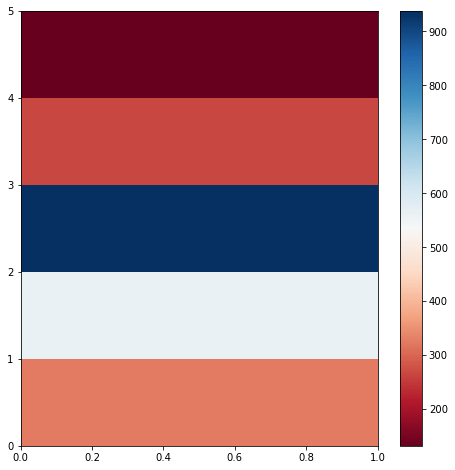

[[327. 563. 938. 265. 132.]]


In [19]:
#To have an idea of which neurons of the map are activated more often we can create another pseudocolor plot that reflects the activation frequencies
plt.figure(figsize=(8, 8))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='RdBu') 
plt.colorbar()
plt.show()
print(frequencies)

In [20]:
import matplotlib.gridspec as gridspec
label_names = {0:'business',1:'entertainment', 2:'politics', 3:'sport', 4:'tech'}
labels_map = som.labels_map(data, [label_names[t] for t in target])

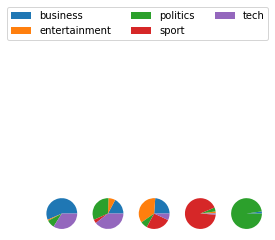

In [21]:
fig = plt.figure(figsize=(4, 4))

the_grid = gridspec.GridSpec(som_shape[0], som_shape[1], fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[position], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(6, 6), ncol=3)
show()

In [22]:
for obj in labels_map.keys():
    print(obj ,labels_map[obj])

(0, 1) Counter({'tech': 222, 'politics': 181, 'business': 97, 'entertainment': 41, 'sport': 22})
(0, 2) Counter({'entertainment': 336, 'sport': 244, 'business': 224, 'politics': 69, 'tech': 65})
(0, 3) Counter({'sport': 245, 'politics': 11, 'entertainment': 5, 'tech': 3, 'business': 1})
(0, 4) Counter({'politics': 129, 'business': 3})
(0, 0) Counter({'business': 185, 'tech': 111, 'politics': 27, 'entertainment': 4})


In [18]:
nerouns_dict = dict()
for neuron in labels_map.keys():
    tmp = max(labels_map[neuron].values())
    label = [name for name, counter in labels_map[neuron].items() if counter == tmp]
    nerouns_dict[neuron] = [label[0] , tmp, sum(labels_map[neuron].values())]
confusion_matrix = np.zeros((5,4))
names_to_class = {'business':0, 'entertainment':1, 'politics':2, 'sport':3, 'tech':4}
for neuron , detail in nerouns_dict.items():
    confusion_matrix[neuron[1]][0] = (len(target) - detail[2])/len(target)
    confusion_matrix[neuron[1]][1] = detail[1]/(detail[1] + detail[2])
    confusion_matrix[neuron[1]][2] = detail[1]/len(target[target == names_to_class[detail[0]]])
    confusion_matrix[neuron[1]][3] = 2 * confusion_matrix[neuron[1]][2]*confusion_matrix[neuron[1]][1]/(
                                        confusion_matrix[neuron[1]][2]+confusion_matrix[neuron[1]][1])
     
confusion_df = pd.DataFrame(confusion_matrix,index = names_to_class.keys(), 
                            columns=['accuracy','precision','recall','f1-score'])
confusion_df


,accuracy,precision,recall,f1-score
business,0.718202,0.358896,0.688235,0.471774
entertainment,0.728090,0.218346,0.421446,0.287660
politics,0.850337,0.468051,0.573386,0.515391
sport,0.828764,0.400943,0.660622,0.499022
tech,0.874607,0.477528,0.611511,0.536278
